Design a fifth-order digital Butterworth low-pass filter with a sampling frequency of 200 Hz and a passband edge of 60 Hz. Plot the modulus and the phase of the transfer function.


In [1]:
import sympy
from sympy.solvers import solve
from sympy import Symbol
import matplotlib.pyplot as plt
import numpy as np

I = sympy.I
PI = np.pi

In [2]:
N = 5
f0 = 60/200

f = Symbol('f')
z = Symbol('z')

f_tab = solve(1+(f/f0)**(2*N), f)
f_real = [sympy.re(f) for f in f_tab]
f_imag = [sympy.im(f) for f in f_tab]

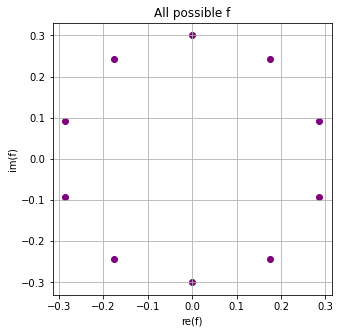

In [3]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(f_real, f_imag, color='purple')
ax.grid(True)
ax.set_title('All possible f')

ax.set_xlabel('re(f)')
ax.set_ylabel('im(f)')
plt.show()

In [4]:
numerator = -I * f0**5 * (z+1)**5
numerator = sympy.Poly(numerator, z)
numerator_coeffs = numerator.coeffs()
    
f1, f2, f3, f4, f5 = list(filter(lambda f: sympy.im(f) > 0, f_tab))

fi_tab = list(filter(lambda f: sympy.im(f) > 0, f_tab))


denominator = 1.0
for fi in fi_tab:
    denominator*= (I*(z-1)-fi*(z+1))
denominator = sympy.Poly(denominator, z)
denominator_coeffs = denominator.coeffs()

In [5]:
numerator_normalized = sympy.Poly((numerator / denominator_coeffs[-1]), z)
denominator_normalized = sympy.Poly((denominator / denominator_coeffs[-1]), z)

numerator_normalized_coeffs = numerator_normalized.coeffs()
denominator_normalized_coeffs = denominator_normalized.coeffs()

print("\n\nNumerator normalized coefficients: ")

for c in numerator_normalized_coeffs:
    print("\n", round(sympy.N(c), 4))
    

print("\n\nDenominator normalized coefficients: ")
for c in denominator_normalized_coeffs:
    print("\n", round(sympy.N(c), 4))



Numerator normalized coefficients: 

 0.0009

 0.0047

 0.0093

 0.0093

 0.0047

 0.0009


Denominator normalized coefficients: 

 -0.1466

 1.0083

 -2.8432

 4.1320

 -3.1207

 1.00000000000000


In [6]:
numerator_clean  = sum(list(map(lambda k, c:  round(sympy.N(c), 6) *z**(N-k), range(N+1), numerator_normalized_coeffs )))
denominator_clean  = sum(list(map(lambda k, c:  round(sympy.N(c), 6) *z**(N-k), range(N+1), denominator_normalized_coeffs )))

Hf = numerator_clean /denominator_clean
Hf

(0.00093*z**5 + 0.004651*z**4 + 0.009303*z**3 + 0.009303*z**2 + 0.004651*z + 0.00093)/(-0.146563*z**5 + 1.008265*z**4 - 2.843225*z**3 + 4.132*z**2 - 3.120708*z + 1.0)


$$ H(f_m) = \frac{\sum_{k=0}^q \alpha_k (e^{2\pi i f_m \Delta})^k}{1 - \sum_{j=1}^p \beta_k  (e^{2\pi i f_m \Delta})^j}$$


$$H(z) = \frac{0.00093𝑧^5 + 0.004651 𝑧^4 + 0.009303 𝑧^3 + 0.009303 𝑧^2 +0.004651 𝑧 + 0.00093}{−0.146563 𝑧^5 + 1.008265 𝑧^4 - 2.843225 𝑧^3 + 4.132 𝑧^2 - 3.120708 𝑧 +1.0}$$